## **Impoting libraries**

In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import os
import random
import matplotlib.pyplot as plt

### Loading Dataset

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_dir = '../input/tomato/New Plant Diseases Dataset(Augmented)/train'
valid_dir = '../input/tomato/New Plant Diseases Dataset(Augmented)/valid'


### EDA

In [3]:
disease_list = os.listdir("../input/tomato/New Plant Diseases Dataset(Augmented)/train")
disease_list

['Tomato___Late_blight',
 'Tomato___healthy',
 'Tomato___Early_blight',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Bacterial_spot',
 'Tomato___Target_Spot',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___Leaf_Mold',
 'Tomato___Spider_mites Two-spotted_spider_mite']

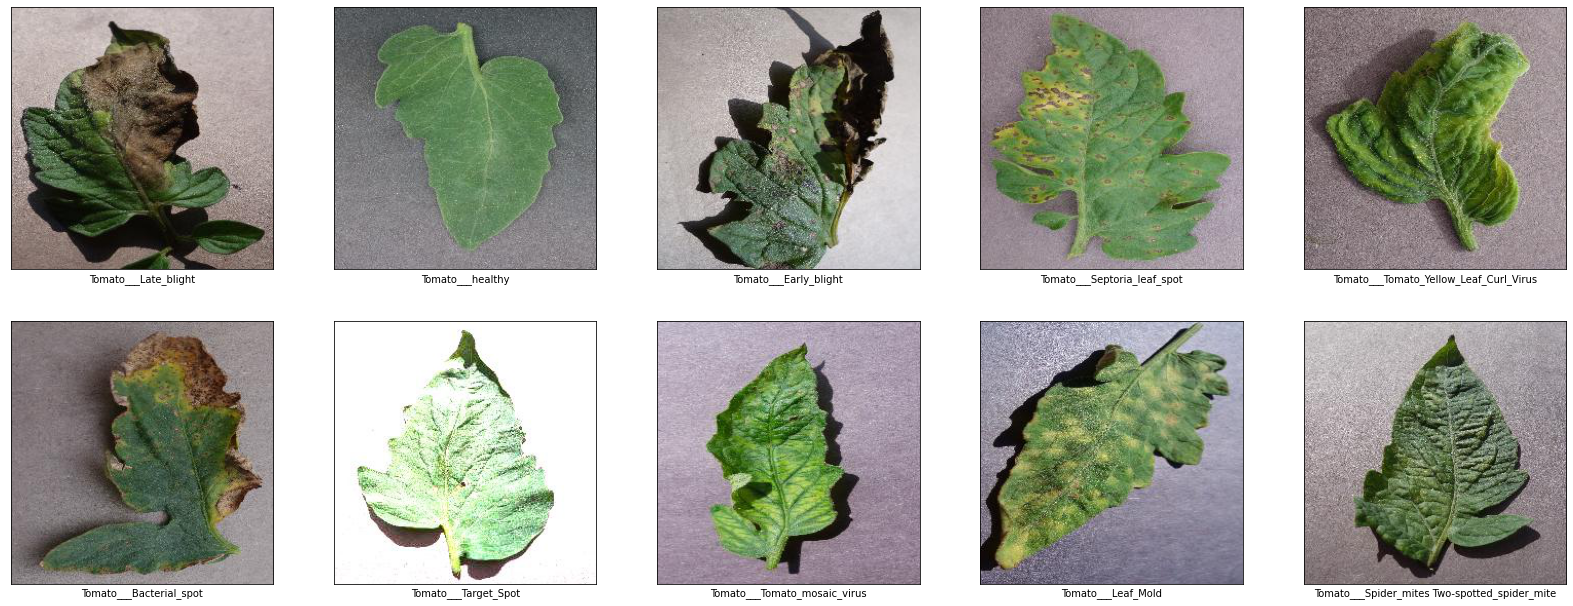

In [4]:
from tensorflow.keras.preprocessing.image import load_img
fig = plt.figure(figsize=(12,9))
fig.set_size_inches(28,28)
i = 0
leaf = []
disease_name = []
leaf_img = []

for disease in disease_list:
    sample = random.sample(os.listdir(train_dir+"/"+disease),1)
    leaf.append(sample)
    disease_name.append(disease)
    
for image in leaf:
    leaf_img.append(image[0]) 
    
i=0    
for image in leaf_img:
    img = load_img(train_dir+"/"+disease_name[i]+"/"+image)
    plt.subplot(5,5,i+1)
    plt.imshow(img)
    plt.xlabel(disease_name[i])
    plt.yticks([])
    plt.xticks([])
    i+=1

### Loading and training the model

In [5]:

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


87916544/87910968 [==============================] - 0s 0us/step


In [6]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [7]:
  # useful for getting number of output classes
folders = glob('../input/tomato/New Plant Diseases Dataset(Augmented)/train/*')

In [8]:

x = Flatten()(inception.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [10]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [11]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
training_set = train_datagen.flow_from_directory('../input/tomato/New Plant Diseases Dataset(Augmented)/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 18345 images belonging to 10 classes.


In [14]:
test_set = test_datagen.flow_from_directory('../input/tomato/New Plant Diseases Dataset(Augmented)/valid',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 4585 images belonging to 10 classes.


In [15]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
574/574 [==============================] - 375s 643ms/step - loss: 4.5693 - accuracy: 0.5927 - val_loss: 1.9687 - val_accuracy: 0.7788
Epoch 2/20
574/574 [==============================] - 225s 391ms/step - loss: 2.1939 - accuracy: 0.7822 - val_loss: 2.0407 - val_accuracy: 0.8076
Epoch 3/20
574/574 [==============================] - 225s 391ms/step - loss: 2.0159 - accuracy: 0.8189 - val_loss: 2.2223 - val_accuracy: 0.8072
Epoch 4/20
574/574 [==============================] - 227s 394ms/step - loss: 1.9378 - accuracy: 0.8376 - val_loss: 1.7765 - val_accuracy: 0.8604
Epoch 5/20
574/574 [==============================] - 227s 394ms/step - loss: 1.6879 - accuracy: 0.8601 - val_loss: 1.6885 - val_accuracy: 0.8702
Epoch 6/20
574/574 [==============================] - 228s 397ms/step - loss: 1.7484 - accuracy: 0.8706 - val_loss: 2.7215 - val_accuracy: 0.8242
Epoch 7/20
574/574 [==============================] - 229s 398ms/step - loss: 1.7359 - accuracy: 0.8725 - val_loss: 2.5313 -

### Ploting the graphs of Loss and Accuracy

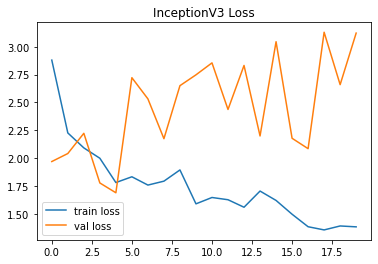

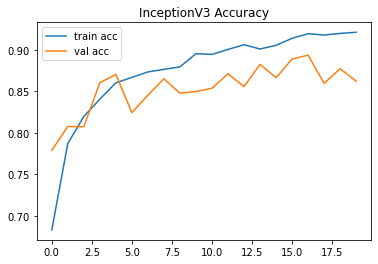

<Figure size 432x288 with 0 Axes>

In [16]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.title("InceptionV3 Loss")
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.title("InceptionV3 Accuracy")
plt.show()
plt.savefig('AccVal_acc')

### Saving the model

In [17]:
model.save("InceptionV3_tomato.model")

## **Predicting**

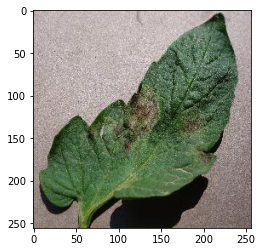

In [18]:
test_img_path="../input/tomato/New Plant Diseases Dataset(Augmented)/valid/Tomato___Late_blight/005e3b43-9050-47da-9498-f9ecdcc703b3___RS_Late.B 5104.JPG"
test_img = plt.imread(test_img_path)

plt.imshow(test_img)
plt.grid(False)

In [19]:
import cv2
import tensorflow as tf
def prepare(filepath):
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    img_array = img_array / 255
    new_array = cv2.resize(img_array, (224, 224))
    return new_array.reshape(-1, 224, 224, 3)

model = tf.keras.models.load_model("./InceptionV3_tomato.model")

In [20]:
prediction = model.predict([prepare(test_img_path)])
np.argmax(prediction)

2

In [21]:
class_dict = training_set.class_indices
class_dict

{'Tomato___Bacterial_spot': 0,
 'Tomato___Early_blight': 1,
 'Tomato___Late_blight': 2,
 'Tomato___Leaf_Mold': 3,
 'Tomato___Septoria_leaf_spot': 4,
 'Tomato___Spider_mites Two-spotted_spider_mite': 5,
 'Tomato___Target_Spot': 6,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7,
 'Tomato___Tomato_mosaic_virus': 8,
 'Tomato___healthy': 9}

In [22]:
if np.argmax(prediction) == 0:
    print("Bacterial_spot")
elif np.argmax(prediction) == 1:
    print("Early_Blight")
elif np.argmax(prediction) == 2:
    print("Late Blight")
elif np.argmax(prediction) == 3:
    print("Leaf Mold")
elif np.argmax(prediction) == 4:
    print("Septoria Leaf Mold")
elif np.argmax(prediction) == 5:
    print("Spider mites")
elif np.argmax(prediction) == 6:
    print("Target Spot")
elif np.argmax(prediction) == 7:
    print("Yellow Leaf Curl Virus")
elif np.argmax(prediction) == 8:
    print("Mosaic Virus")
else:
    print("Healthy")

Late Blight
